In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# For visuals
sns.set(style="whitegrid")




I have  imported the required Python libraries used for data analysis and visualization:

- 'pandas' and 'numpy' for handling and manipulating data.
- 'matplotlib.pyplot' and 'seaborn' for creating plots and visualizations.
- 'warnings' was used to suppress unnecessary warnings for cleaner notebook output.
- I have also set Seaborn’s style to `"whitegrid"` to improve the aesthetics of the plots.




In [2]:
# Load the dataset 
df = pd.read_csv('bearing_defects_mixed_dataset.csv', keep_default_na=False)


# Display shape and head
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (200000, 27)


,num_feature_1,num_feature_2,num_feature_3,num_feature_4,num_feature_5,num_feature_6,num_feature_7,num_feature_8,num_feature_9,num_feature_10,...,num_feature_18,num_feature_19,num_feature_20,material_type,machine_type,lubrication_type,operation_condition,maintenance_level,timestamp,defect
0,43.642490,50.075743,75.905090,65.451319,33.026446,109.970229,19.318480,12.893328,48.885448,60.225263,...,-54.848113,-46.346560,-47.675522,Composite,Type_A,Oil,Normal,Medium,2032-02-29 14:00:00,0
1,79.804239,40.899368,88.078385,69.074098,45.487471,99.258668,21.702854,-2.482531,41.801678,63.316716,...,-55.526576,-84.828118,25.018314,Alloy,Type_A,None,Underload,Medium,2033-06-23 16:00:00,0
2,70.558488,45.127150,89.527756,61.449573,37.903140,100.595703,23.807816,12.316121,45.751075,65.390026,...,-55.226361,-25.323832,-24.654994,Alloy,Type_A,Grease,Normal,Medium,2045-02-13 09:00:00,0
3,82.495818,-2.337097,88.349540,55.872357,36.195380,97.336603,21.616839,29.797963,58.137785,59.114962,...,-23.448691,-28.772028,-6.930542,Ceramic,Type_C,Grease,Underload,Medium,2033-01-01 16:00:00,0
4,85.750787,23.464038,81.020081,69.114904,48.622171,104.918531,32.058267,27.946606,49.741031,83.129501,...,-15.495665,-38.869694,-22.014363,Steel,Type_B,Grease,Underload,Medium,2027-10-05 05:00:00,0




In this cell, I loaded the dataset using `pandas.read_csv()` and stored it in a DataFrame named `df`.

- I used the parameter `keep_default_na=False` to make sure that string entries like `"None"` (used in categorical columns like `lubrication_type`) are **not accidentally treated as NaN** (missing values).
- After loading the dataset, I printed its shape to check the number of rows and columns.
- Finally, I displayed the first 5 rows using `df.head()` to get an initial view of the structure and content of the dataset.

From this, I observed that:
- The dataset contains **200,000 rows and 27 columns**.
- The first few columns represent various numerical features named from `num_feature_1` to `num_feature_20`, followed by categorical features, a timestamp column, and the target variable `defect`.




In [3]:
# View info
df.info()

# View column names
print("\nColumns in dataset:\n", df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   num_feature_1        200000 non-null  float64
 1   num_feature_2        200000 non-null  float64
 2   num_feature_3        200000 non-null  float64
 3   num_feature_4        200000 non-null  float64
 4   num_feature_5        200000 non-null  float64
 5   num_feature_6        200000 non-null  float64
 6   num_feature_7        200000 non-null  float64
 7   num_feature_8        200000 non-null  float64
 8   num_feature_9        200000 non-null  float64
 9   num_feature_10       200000 non-null  float64
 10  num_feature_11       200000 non-null  float64
 11  num_feature_12       200000 non-null  float64
 12  num_feature_13       200000 non-null  float64
 13  num_feature_14       200000 non-null  float64
 14  num_feature_15       200000 non-null  float64
 15  num_feature_16   



 I checked the basic structure of the dataset using `df.info()` and listed all column names.

- `df.info()` shows that there are 200,000 rows and 27 columns.
- It also tells me that there are **no missing values**.
- I confirmed that most columns are **numerical**, a few are **categorical**, and the `defect` column is the target.
- Finally, I used `df.columns.tolist()` to view all the column names at once.




In [4]:
# Check for missing values
df.isnull().sum()


num_feature_1          0
num_feature_2          0
num_feature_3          0
num_feature_4          0
num_feature_5          0
num_feature_6          0
num_feature_7          0
num_feature_8          0
num_feature_9          0
num_feature_10         0
num_feature_11         0
num_feature_12         0
num_feature_13         0
num_feature_14         0
num_feature_15         0
num_feature_16         0
num_feature_17         0
num_feature_18         0
num_feature_19         0
num_feature_20         0
material_type          0
machine_type           0
lubrication_type       0
operation_condition    0
maintenance_level      0
timestamp              0
defect                 0
dtype: int64



In this cell, I checked if there are any missing values in the dataset using `df.isnull().sum()`.

 The output shows that **all columns have 0 missing values**, including both numerical and categorical features.

 This means the dataset is **clean** and I don’t need to handle any missing data during preprocessing.


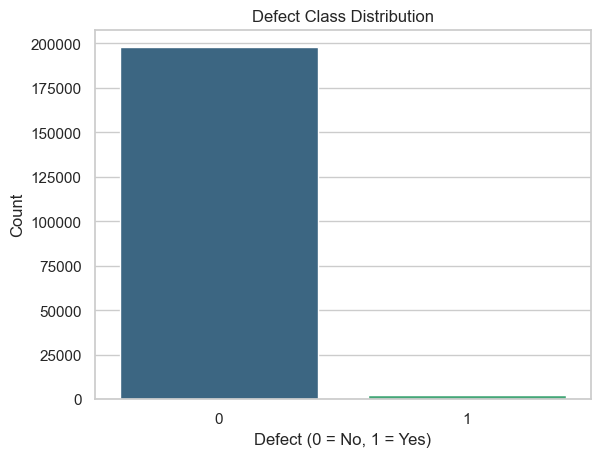

defect
0    98.955
1     1.045
Name: proportion, dtype: float64


In [5]:
# Count of each class
sns.countplot(x='defect', data=df, palette='viridis')
plt.title("Defect Class Distribution")
plt.xlabel("Defect (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Print % of class imbalance
defect_rate = df['defect'].value_counts(normalize=True) * 100
print(defect_rate)




In this cell, I visualized the distribution of the target variable `defect` to understand the class imbalance in the dataset.

The count plot shows how many samples belong to each class:
- Class `0` → Non-defective
- Class `1` → Defective

I calculated the percentage of each class using `value_counts(normalize=True)`.

## Observation:
- The majority of samples belong to class `0` (non-defective).
- Around **98.96%** of the data has no defect.
- Only **1.04%** of the samples are labeled as defective (class `1`).

## Interpretation:
This confirms that the dataset is **highly imbalanced**, which can bias models toward predicting the majority class.
To address this, I handled the imbalance  during the preprocessing phase, so that the model can learn from both classes effectively.


In [6]:
# Describe only numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
num_feature_1,200000.0,61.018866,19.259291,-25.010722,48.016944,61.032803,74.022210,148.869590
num_feature_2,200000.0,31.980080,17.335409,-46.648438,20.272909,31.980690,43.706250,111.463171
num_feature_3,200000.0,82.994711,9.040916,45.242559,76.913053,83.015068,89.094050,125.095082
num_feature_4,200000.0,69.036952,13.438538,10.925607,59.960249,69.064605,78.115385,129.861759
num_feature_5,200000.0,48.999360,10.597736,2.228490,41.870979,49.054122,56.090767,97.498789
num_feature_6,200000.0,97.983067,7.814856,60.567592,92.715645,97.998028,103.239703,133.284300
num_feature_7,200000.0,23.985006,5.361068,-1.109426,20.381184,23.974894,27.604805,47.117555
num_feature_8,200000.0,12.990115,13.764407,-52.786387,3.731759,12.999757,22.262439,74.741534
num_feature_9,200000.0,48.996566,5.208157,25.907512,45.502136,49.002126,52.486172,74.136481
num_feature_10,200000.0,69.020968,11.099554,18.893945,61.530849,69.034793,76.522597,117.459211



To understand the distribution and basic characteristics of the numerical data, I used the `.describe().T` function. This provides key descriptive statistics for each numerical column in the dataset.

- **Count**: Shows that each feature has 200,000 data points, meaning there are no missing values.
- **Mean and Standard Deviation (std)**: Helps in understanding the central tendency and spread of the data.
- **Min, 25%, 50%, 75%, Max**: These percentiles show how the data is spread and whether it's skewed. For example, we can quickly spot features with wide ranges (like `num_feature_11`, `num_feature_20`).
- The last row represents the target variable `defect`, where the mean value (~0.01) again confirms the class imbalance seen earlier.

This step was helpful in identifying potential outliers, feature scaling needs, and understanding data distribution before moving on to modeling.


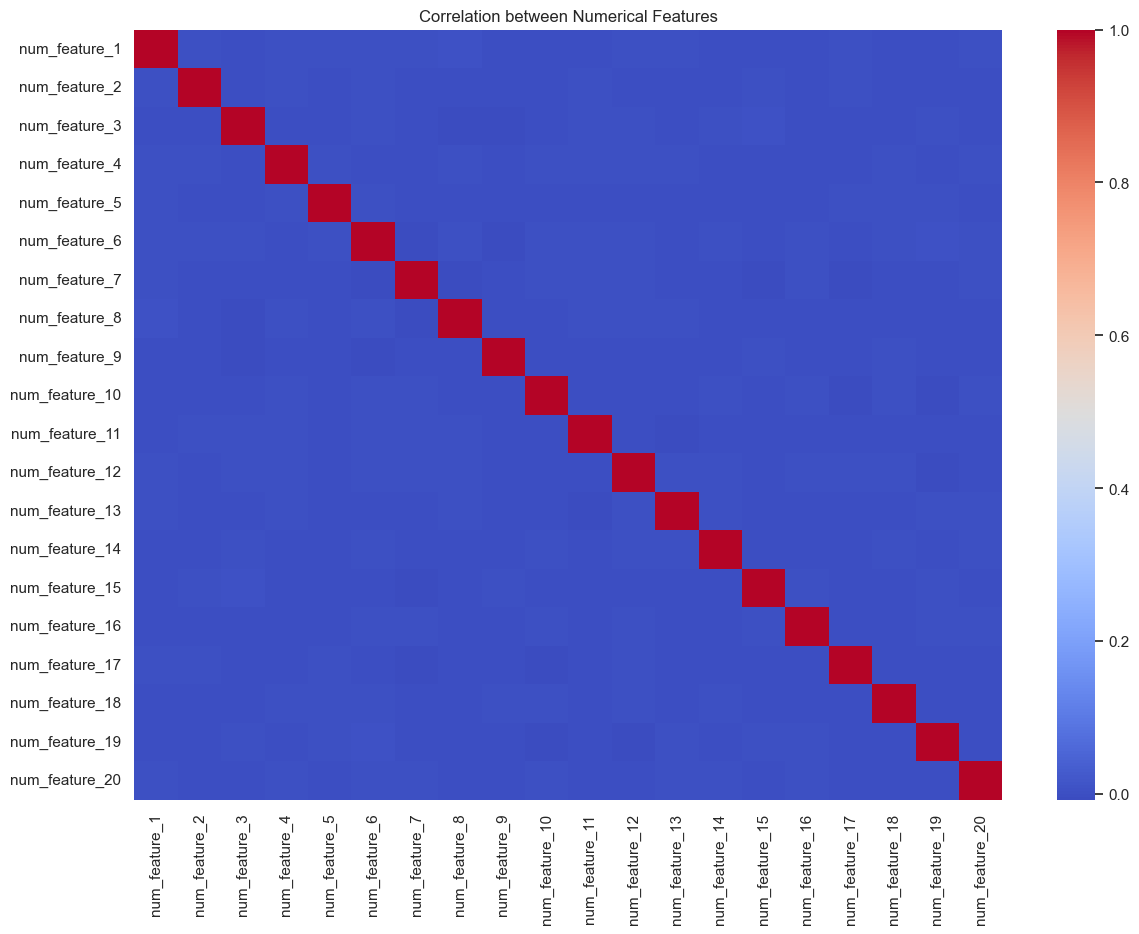

In [7]:
# Select only numerical features
num_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['defect'])

# Correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(num_features.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation between Numerical Features")
plt.show()


## Correlation Between Numerical Features

In this step, I explored the relationship between different numerical features using a **correlation heatmap**.

- I first selected only numerical columns (excluding the target `defect`) using `select_dtypes()`.
- Then, I plotted the correlation matrix using **Seaborn's heatmap**, which visually highlights how strongly features are related to each other.
- The `cmap='coolwarm'` helps in distinguishing between positive (red) and negative (blue) correlations.

Although annotations were turned off for clarity (`annot=False`), the heatmap still gave a good visual sense of multicollinearity or independence among features. This helps in:
- Identifying redundant features,
- Understanding which features are highly correlated (either positively or negatively),
- Potentially deciding feature selection or dimensionality reduction techniques later on.


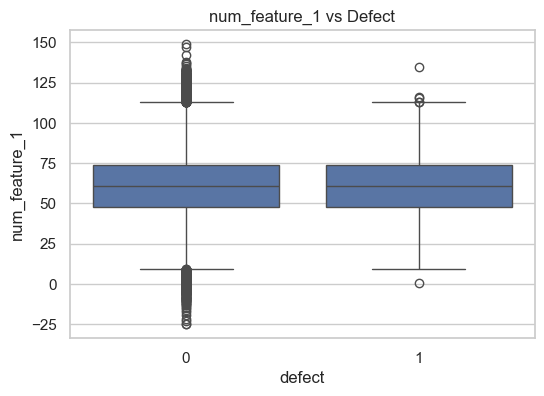

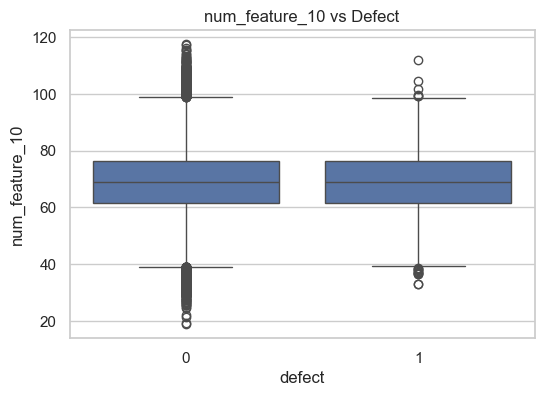

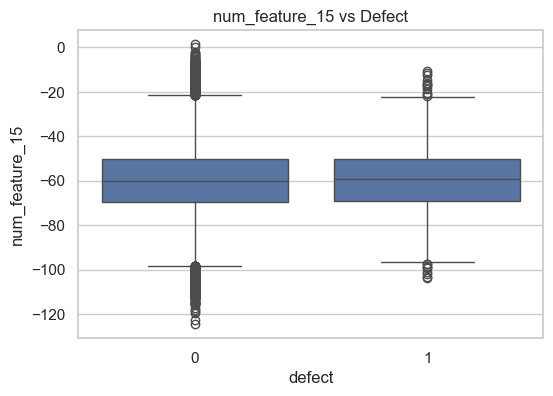

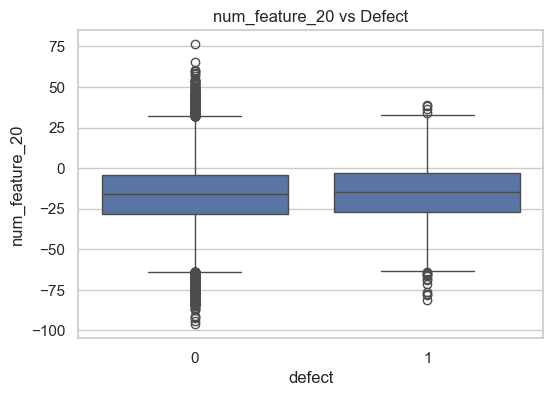

In [8]:
# Boxplots for a few numerical features vs defect
features_to_plot = ['num_feature_1', 'num_feature_10', 'num_feature_15', 'num_feature_20']
for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='defect', y=feature, data=df)
    plt.title(f"{feature} vs Defect")
    plt.show()


###  Boxplots: Numerical Features vs Defect

To understand how individual numerical features behave with respect to the `defect` target, I plotted boxplots for a selected few:

- `num_feature_1`
- `num_feature_10`
- `num_feature_15`
- `num_feature_20`

Each boxplot compares the distribution of a feature for **defective (1)** vs **non-defective (0)** cases.

 Key points:
- This visual helps identify if there are any noticeable shifts in distribution or presence of outliers between classes.
- For example, if a feature shows different medians or spread across defect classes, it could be **informative for classification**.
- These visualizations also give early insights into **feature importance** and **class separability**.

This step helps build an intuitive understanding of the data, which is useful before applying machine learning models.


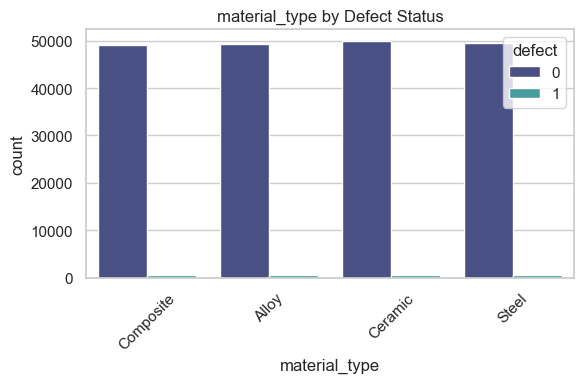

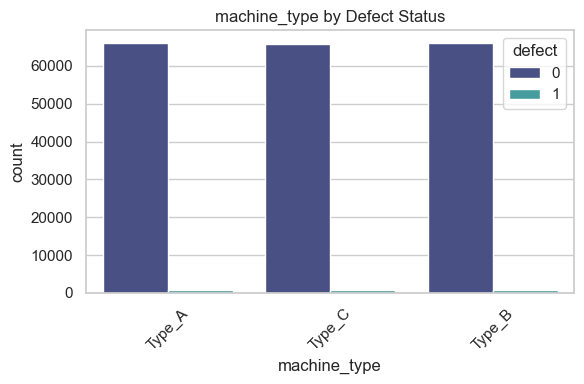

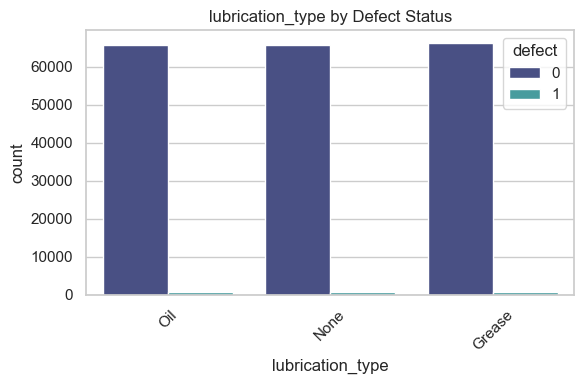

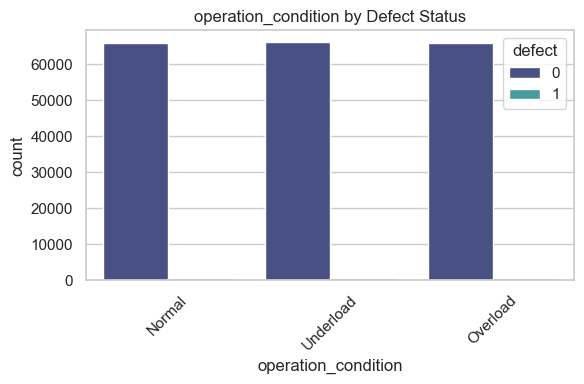

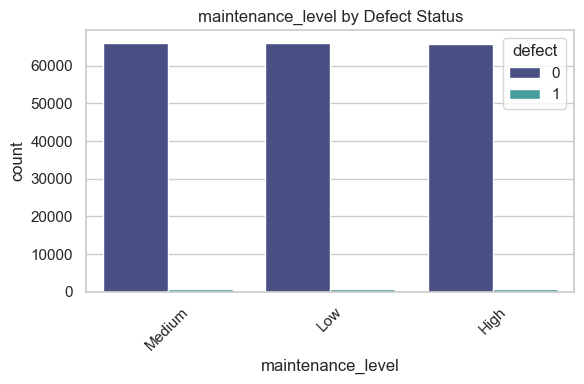

In [9]:
categorical_features = ['material_type', 'machine_type', 'lubrication_type',
                        'operation_condition', 'maintenance_level']

# Plot categorical distributions
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='defect', palette='mako')
    plt.title(f"{col} by Defect Status")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Categorical Feature Distribution by Defect Status

To analyze the relationship between categorical features and the target variable `defect`, I plotted count plots for the following categorical columns:

- `material_type`
- `machine_type`
- `lubrication_type`
- `operation_condition`
- `maintenance_level`

Each plot displays the count of each category, split by defect status (`0 = No defect`, `1 = Defect`), using the `hue='defect'` parameter.

 Observations and Purpose:
- These plots help visualize how defects are distributed across different categories.
- Imbalances or visible patterns may suggest that certain categories are more prone to defects.
- This step is crucial for understanding the **class distribution** within categorical features and helps in deciding **encoding techniques** later.

By rotating the x-axis labels and adjusting the layout, the plots are made more readable for interpretation.


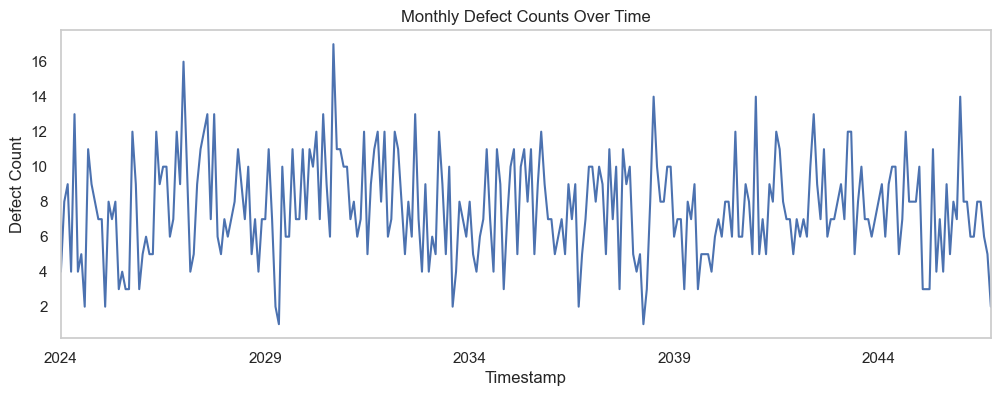

In [10]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot defects over time
df.set_index('timestamp').resample('M')['defect'].sum().plot(figsize=(12,4))
plt.title("Monthly Defect Counts Over Time")
plt.ylabel("Defect Count")
plt.xlabel("Timestamp")
plt.grid()
plt.show()


###  Temporal Analysis of Defects

To understand how defects vary over time, I performed the following steps:

1. **Converted the `timestamp` column** to datetime format using `pd.to_datetime()` to ensure proper handling of date and time information.
2. **Set `timestamp` as the index** of the DataFrame to enable time-based operations.
3. **Resampled the data monthly** using `.resample('M')` to group defect counts by month.
4. **Plotted the sum of defects** for each month to visualize any trends or patterns over time.

 Observations:
- This visualization helps identify any time-based trends or seasonality in defect occurrences.
- Peaks or troughs in the graph can indicate periods of higher or lower failure rates, which may guide preventive maintenance schedules or process improvements.

This time-series plot is essential for incorporating a **temporal perspective** into the analysis.


##  Task 1: Exploratory Data Analysis (EDA) Summary

I performed a thorough EDA on the bearing defects dataset to understand its structure, patterns, and potential challenges before modeling. Below is a summary of key steps and insights:

###  Dataset Overview
- Total Records: **200,000**
- Total Features: **27**
- Feature Types:
  - Numerical: 20
  - Categorical: 6
  - Target Variable: `defect` (binary: 0 = No defect, 1 = Defect)

###  Data Quality Checks
- **No missing values** were found in any column.
- Data types are consistent with expected formats (e.g., floats for sensor readings, objects for categorical data).

###  Target Variable Distribution
- The dataset is **highly imbalanced**:
  - 0 (No Defect): ~98.95%
  - 1 (Defect): ~1.05%
- This suggests the need for techniques to handle imbalance during model training.

###  Descriptive Statistics
- Used `.describe().T` to examine statistical summaries of numerical features.
- Identified features with wide ranges and potential outliers.

###  Correlation Heatmap
- Plotted a correlation heatmap to detect relationships among numerical features.
- Helps identify redundancy or multicollinearity for feature selection.

###  Boxplots vs. Defect
- Visualized the relationship between selected numerical features and the target variable using boxplots.
- Certain features show noticeable differences in distribution between defective and non-defective cases.

###  Categorical Feature Analysis
- Plotted category-wise defect distributions using `sns.countplot`.
- Useful for encoding and understanding class-wise defect behavior.

###  Time Series Analysis
- Converted `timestamp` to datetime format and plotted monthly defect trends.
- Observed variations in defect count over time, which could be valuable for time-aware modeling or maintenance planning.



 **Conclusion:**  
This EDA provided a comprehensive understanding of the dataset's structure, class imbalance, feature distributions, and potential relationships. The insights gained here will guide the next stages — feature engineering, selection, and model building.
